The below notebook predicts the time series data for a complicated function with varying frequencies and altitudes using an LSTM model

In [0]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import keras
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import math

# fix random seed for reproducibility
np.random.seed(7)

Epoch 1/100
 - 5s - loss: 0.0056
Epoch 2/100
 - 5s - loss: 3.2183e-05
Epoch 3/100
 - 5s - loss: 2.8688e-05
Epoch 4/100
 - 5s - loss: 2.8453e-05
Epoch 5/100
 - 5s - loss: 2.8095e-05
Epoch 6/100
 - 5s - loss: 2.6407e-05
Epoch 7/100
 - 5s - loss: 2.6626e-05
Epoch 8/100
 - 5s - loss: 2.7080e-05
Epoch 9/100
 - 5s - loss: 2.6285e-05
Epoch 10/100
 - 5s - loss: 2.5401e-05
Epoch 11/100
 - 5s - loss: 2.6544e-05
Epoch 12/100
 - 5s - loss: 2.6330e-05
Epoch 13/100
 - 5s - loss: 2.5958e-05
Epoch 14/100
 - 5s - loss: 2.6357e-05
Epoch 15/100
 - 5s - loss: 2.5189e-05
Epoch 16/100
 - 5s - loss: 2.4187e-05
Epoch 17/100
 - 5s - loss: 2.5281e-05
Epoch 18/100
 - 5s - loss: 2.4584e-05
Epoch 19/100
 - 5s - loss: 2.5226e-05
Epoch 20/100
 - 5s - loss: 2.5083e-05
Epoch 21/100
 - 5s - loss: 2.3543e-05
Epoch 22/100
 - 5s - loss: 2.3139e-05
Epoch 23/100
 - 5s - loss: 2.3687e-05
Epoch 24/100
 - 5s - loss: 2.2902e-05
Epoch 25/100
 - 5s - loss: 2.2958e-05
Epoch 26/100
 - 5s - loss: 2.2457e-05
Epoch 27/100
 - 5s - loss

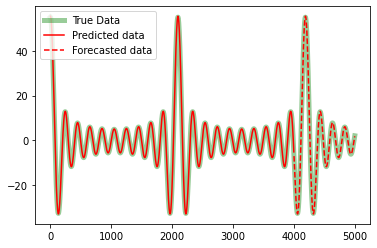

In [0]:
N = 5000
X = np.linspace(0, 15, N)
Y = 10*(np.cos(10*X)) + 9*(np.cos(9*X)) + 8*(np.cos(8*X)) + \
7*(np.cos(7*X)) + 6*(np.cos(6*X)) + 5*(np.cos(5*X)) + 4*(np.cos(4*X)) +\
3*(np.cos(3*X)) + 2*(np.cos(2*X)) + np.cos(X)
dataset = Y.reshape(Y.size, 1)

scaler = MinMaxScaler(feature_range=(0, 1)) #Ask about this
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset), 'g', linewidth=5, alpha=0.4, label='True Data')
plt.plot(trainPredictPlot, color = 'red', label = 'Predicted data')
plt.plot(testPredictPlot, '--' , color = 'red', label = 'Forecasted data')
plt.legend()
plt.show()